In [1]:
from custom_ensemble import CustomEnsemble
import predefined_models as pm
import pandas as pd
% matplotlib inline

In [3]:
# Read example data into pandas dataframe
df = pd.read_csv("example_df.csv", header=None, names=["c" + str(each) for each in range(1, 21)])
train_cols = ["c" + str(each) for each in range(1, 20)]
test_col = "c20"
# The dataset has been downloaded from https://archive.ics.uci.edu/ml/datasets.html webpage, Diabetic Retinopathy dataset from
# University of Debrecen: https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set
# Let's look into the data
# The first 19 columns are the feature columns, the last column is our target column
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20
0,1,1,22,22,22,19,18,14,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1,0
1,1,1,24,24,22,18,16,13,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0,0
2,1,1,62,60,59,54,47,33,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0,1
3,1,1,55,53,53,50,43,31,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0,0
4,1,1,44,44,44,41,39,27,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0,1


best trained score: 0.6869565217391305


346
346
346
TN 127 	FP 28
FN 77 	TP 114


best trained score: 0.7403726708074534
Feature doesnt have feature_importances_ attr
346
346
346
TN 129 	FP 26
FN 60 	TP 131


best trained score: 0.6149068322981367
Feature doesnt have feature_importances_ attr
346
346
346
TN 102 	FP 53
FN 92 	TP 99


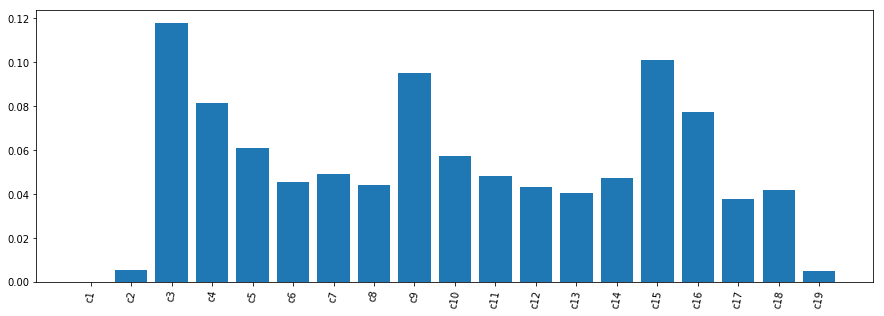

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df[test_col], test_size=0.3, random_state=42)

#Initiate Custom ensemble class
ce = CustomEnsemble(X_train, y_train, X_test, y_test)
# Trying 3 different model as layer one
ce.grid_search_layer1('model1', pm.randomforest_classifier,pm.randomforest_classifier_def_par)

# For each of the model we can have a report about the performance
ce.get_report('model1')
ce.grid_search_layer1('model2', pm.logistic_regression, pm.logistic_regression_def_par)
ce.get_report('model2')
ce.grid_search_layer1('model3', pm.gaussian_process, pm.gaussian_process_def_par)
ce.get_report('model3')

set_layer  ((('model1', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)), ('model2', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('model3', GaussianProcessClassifier(copy_X_train=True, kernel=None,
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False))),)
predict for mod

[1 1 1 0 0 1 1 1 0 0]
predict for model:  model1
predict for model:  model2
predict for model:  model3


best trained score: 1.0
346
346
346
TN 91 	FP 64
FN 33 	TP 158


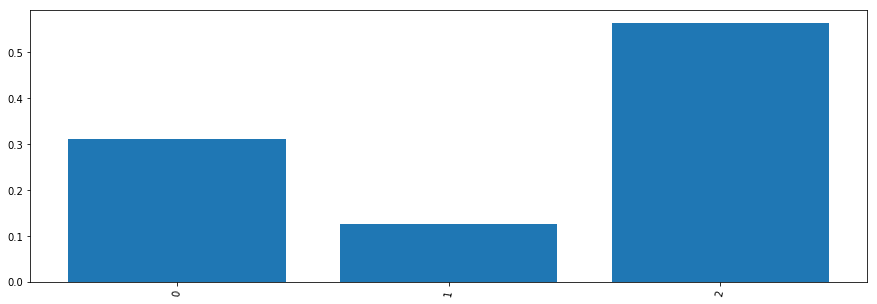

In [5]:
ce.set_layer1_from_gridsearch('model1', 'model2', 'model3')

ce.grid_search_layer2('model4', pm.randomforest_classifier, pm.randomforest_classifier_def_par)

ce.get_report('model4')

In [37]:
ce.set_layer2_from_gridsearch('model4')
predicted_x = ce.predict(X_test)

set_layer  ((('mod5', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)),),)
predict for model:  mod4
predict for model:  mod2
predict for model:  mod3
predict for model:  mod5


In [38]:
predicted_x -y_test.values

array([ 0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0, -1,  1,  0,  0,  1,
        0,  1,  0,  1,  1, -1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  1,  0, -1,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  1,
        1,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  1, -1, -1,  0,  0,  1,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  0, -1, -1,  1, -1,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  1,  1,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0, -1,  0,  1,  0, -1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  1,
        0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1

In [39]:
ce._grid_searches2

{'mod5': GridSearchCV(cv=None, error_score='raise',
        estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
        fit_params=None, iid=True, n_jobs=1,
        param_grid={'max_depth': [3, 4, 5, 6], 'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy']},
        pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
        scoring=None, verbose=0),
 'mod6': GridSearchCV(cv=None, error_score='raise',
        estimator=SVC(C=0.025, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False